In [1]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import windows
from scipy.stats import pearsonr

In [32]:
def convolve_w_gaussian(spike_times, time):
    T_samp = np.mean(np.diff(time))

    n = int(0.05 / T_samp)
    alpha = 2.5 # Pulled from comparison with matlab gaussian window
    std = (n-1) / (2*alpha)
    
    convolved = np.convolve(spike_times, windows.gaussian(n, std=std), mode='same')

    return convolved

In [33]:
def load_outputs(pth):
    mat = sio.loadmat(pth)
    spike_probs = mat['spike_prob']
    time = mat['time']

    return spike_probs[0], time

In [34]:
def open_Janelia_1(j_path):
    all_data = sio.loadmat(j_path)
    #print(all_data[0])
    data = all_data['dff']
    time = all_data['time_stamps']
    spikes = all_data['ap_times']

    return time, data, spikes

# Toy Data

In [12]:
gt_spike_times = np.loadtxt('sample_data/stimtimes_poisson_counts.dat')

In [13]:
gt_spike_times

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
[x for x in os.listdir('sample_data/output') if "output" in x and ".mat" in x]

['cRNN_BC_trunc_output.mat',
 'default_output.mat',
 'cRNN_no_dense_trunc_output.mat',
 'cRNN_no_relu_no_smooth_trunc_output.mat',
 'cRNN_sigmoid_trunc_output.mat',
 'cRNN_sigmoid_no_relu_no_smooth_trunc_output.mat',
 'default_trunc_output.mat',
 'cRNN_sigmoid_relu_smooth_trunc_output.mat',
 'cRNN_no_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_no_relu_smooth_trunc_output.mat',
 'cRNN_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_relu_no_smooth_trunc_output.mat',
 'cRNN_relu_no_smooth_trunc_output.mat',
 'cRNN_trunc_output.mat',
 'cRNN_sigmoid_BC_trunc_output.mat']

In [8]:
spike_probs_default, time_default = load_outputs('sample_data/output/default_trunc_output.mat')
spike_probs_cRNN, time_cRNN = load_outputs('sample_data/output/cRNN_trunc_output.mat')
spike_probs_cRNN_no_dense, time_cRNN_no_dense = load_outputs('sample_data/output/cRNN_no_dense_trunc_output.mat')
#spike_probs_cRNN_sigmoid, time_cRNN_sigmoid = load_outputs('sample_data/output/cRNN_sigmoid_trunc_output.mat')
#spike_probs_cRNN_BC, time_cRNN_BC = load_outputs('sample_data/output/cRNN_BC_trunc_output.mat')

spike_probs_cRNN_relu_no_smooth, time_cRNN_relu_no_smooth = load_outputs('sample_data/output/cRNN_relu_no_smooth_trunc_output.mat')
spike_probs_cRNN_relu_smooth, time_cRNN_relu_smooth = load_outputs('sample_data/output/cRNN_relu_smooth_trunc_output.mat')
spike_probs_cRNN_no_relu_no_smooth, time_cRNN_no_relu_no_smooth = load_outputs('sample_data/output/cRNN_no_relu_no_smooth_trunc_output.mat')
spike_probs_cRNN_no_relu_smooth, time_cRNN_no_relu_smooth = load_outputs('sample_data/output/cRNN_no_relu_smooth_trunc_output.mat')


In [9]:
convolved_spike_times = convolve_w_gaussian(gt_spike_times, time_default)
convolved_spike_probs_default = convolve_w_gaussian(spike_probs_default, time_default)
convolved_spike_probs_cRNN = convolve_w_gaussian(spike_probs_cRNN, time_cRNN)
convolved_spike_probs_cRNN_no_dense = convolve_w_gaussian(spike_probs_cRNN_no_dense, time_cRNN_no_dense)
#convolved_spike_probs_cRNN_sigmoid = convolve_w_gaussian(spike_probs_cRNN_sigmoid, time_cRNN_sigmoid)
#convolved_spike_probs_cRNN_BC = convolve_w_gaussian(spike_probs_cRNN_BC, time_cRNN_BC)

convolved_spike_probs_relu_no_smooth = convolve_w_gaussian(spike_probs_cRNN_relu_no_smooth, time_cRNN_relu_no_smooth)
convolved_spike_probs_relu_smooth = convolve_w_gaussian(spike_probs_cRNN_relu_smooth, time_cRNN_relu_smooth)
convolved_spike_probs_no_relu_no_smooth = convolve_w_gaussian(spike_probs_cRNN_no_relu_no_smooth, 
                                                              time_cRNN_no_relu_no_smooth)
convolved_spike_probs_no_relu_smooth = convolve_w_gaussian(spike_probs_cRNN_no_relu_smooth, time_cRNN_no_relu_smooth)


In [23]:
plt.subplots(2, 1, 1)
r1 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_default[57:-57])
r2 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN[57:-57])
r3 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_no_dense[57:-57])
#r4 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_sigmoid[57:-57])
#r5 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_BC[57:-57])
r6 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_relu_no_smooth[57:-57])
r7 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_relu_smooth[57:-57])
r8 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_no_relu_no_smooth[57:-57])
r9 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_no_relu_smooth[57:-57])

plt.plot(time_default[0], convolved_spike_times, label = "ground_truth")
plt.plot(time_default[0], convolved_spike_probs_default, label="Cascade: " + f"{r1[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_cRNN, label="cRNN: " + f"{r2[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_cRNN_no_dense, label="cRNN_no_dense: " + f"{r3[0]:.2f}")
#plt.plot(convolved_spike_probs_cRNN_sigmoid, label="cRNN_sigmoid: " + f"{r4[0]:.2f}")
#plt.plot(convolved_spike_probs_cRNN_BC, label="cRNN_BC: " + f"{r5[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_relu_no_smooth, label="cRNN_relu_no_smooth: " + f"{r6[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_relu_smooth, label="cRNN_relu_smooth: " + f"{r7[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_no_relu_no_smooth, label="cRNN_no_relu_no_smooth: " + f"{r8[0]:.2f}")
plt.plot(time_default[0], convolved_spike_probs_no_relu_smooth, label="cRNN_no_relu: " + f"{r9[0]:.2f}")

#for i,spike in enumerate(gt_spike_times):
#    if spike == 1:
#        plt.axvline(x=time_default[0][i], color = 'k', linestyle="--")


plt.legend()
plt.ylabel("Spike Rate")
plt.xlabel("Time (s)")
#plt.savefig("cascade_changes_fig.png")
#plt.title("Pearson's Correlation across ")

plt.subplots(2, 1, 2)
plt.plot(time, fluo_data)
for i,spike in enumerate(gt_spike_times):
    if spike == 1:
        plt.axvline(x=time[i], color = 'k', linestyle="--")
plt.ylabel("DF/F")
plt.xlabel("Time (s)")
plt.savefig("raw_data.png")

TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

: 

In [17]:
data_file="sample_data/LineScan-11302022-0954-009_0_data_poisson.dat"
gtSpike_file="sample_data/stimtimes_poisson_counts.dat"

In [18]:
data = np.loadtxt(data_file).transpose()
time = data[0,:]
fluo_data = data[1,:]

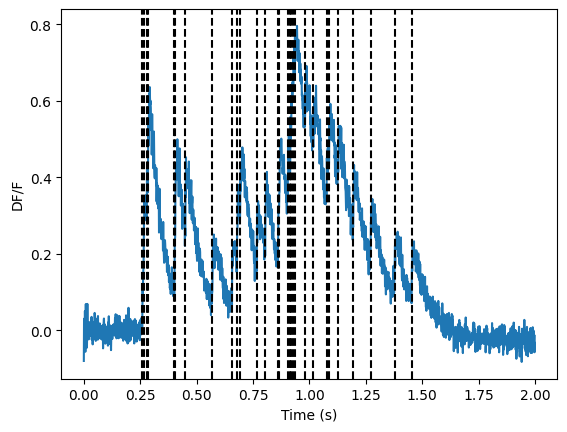

: 

: 

In [19]:
plt.plot(time, fluo_data)
for i,spike in enumerate(gt_spike_times):
    if spike == 1:
        plt.axvline(x=time[i], color = 'k', linestyle="--")
plt.ylabel("DF/F")
plt.xlabel("Time (s)")
plt.savefig("raw_data.png")

# Real Data

In [5]:
filename = os.path.join("gt_data","jGCaMP8f_ANM471994_cell01.mat")
all_data = sio.loadmat(filename)
time,data,spikes = open_Janelia_1(filename)
time1 = np.float64(time[0,1000:3040-1])
time1 = time1.copy()
data1 = np.float64(data[0,1000:3040-1])
data1 = data1.copy()
spikes = spikes[0]

In [6]:
spikes.shape

(1688,)

In [7]:
ap_time_low_thresh = spikes[spikes > time1[0]]
ap_time_high_thresh = ap_time_low_thresh[ap_time_low_thresh < time1[-1]]
first_ap_ind = np.where(ap_time_high_thresh[0] == spikes)[0][0]
last_ap_ind = np.where(ap_time_high_thresh[-1] == spikes)[0][0]
    
    
#Convole spike times with gaussian
binary_spike_times = np.zeros(time1.shape)
for spike_time in spikes[first_ap_ind:last_ap_ind+1]:
    spike_ind = np.where(np.isclose(spike_time, time1, 
                                        atol=0.01) == True)[0][0]
    binary_spike_times[spike_ind] = 1

Text(0.5, 0, 'Time(s)')

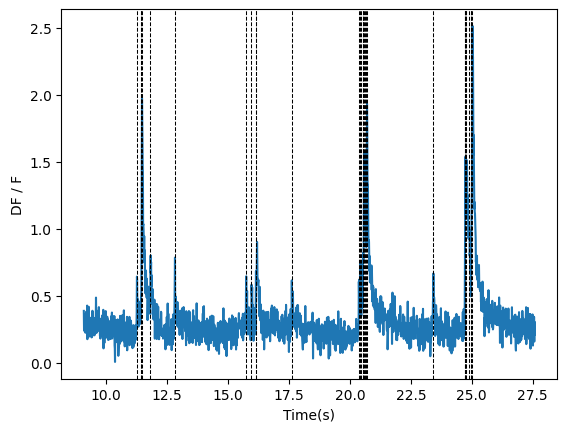

In [8]:
plt.plot(time1, data1)
for i,spike in enumerate(binary_spike_times):
    if spike == 1:
        plt.axvline(x=time1[i], color = 'k', linestyle="--", linewidth=0.75)
plt.ylabel("DF / F")
plt.xlabel("Time(s)")

In [9]:
[x for x in os.listdir('sample_data/output') if "output" in x and ".mat" in x]

['cRNN_BC_trunc_output.mat',
 'default_output.mat',
 'cRNN_no_dense_trunc_output.mat',
 'cRNN_no_relu_no_smooth_trunc_output.mat',
 'cRNN_sigmoid_trunc_output.mat',
 'cRNN_sigmoid_no_relu_no_smooth_trunc_output.mat',
 'default_trunc_output.mat',
 'cRNN_sigmoid_relu_smooth_trunc_output.mat',
 'default_janelia_output.mat',
 'cRNN_no_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_no_relu_smooth_trunc_output.mat',
 'cRNN_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_relu_no_smooth_trunc_output.mat',
 'cRNN_no_relu_janelia_output.mat',
 'cRNN_relu_no_smooth_trunc_output.mat',
 'cRNN_trunc_output.mat',
 'cRNN_sigmoid_BC_trunc_output.mat']

In [10]:
spike_probs_cRNN, time_cRNN = load_outputs('sample_data/output/cRNN_no_relu_janelia_output.mat')
spike_probs_default, time_default = load_outputs('sample_data/output/default_janelia_output.mat')

In [11]:
convolved_spike_probs_cRNN = convolve_w_gaussian(spike_probs_cRNN, time_cRNN)
convolved_spike_probs_default = convolve_w_gaussian(spike_probs_default, time_default)
convolved_gt_spikes = convolve_w_gaussian(binary_spike_times, time1)

In [14]:
def normalize_data(data):
    data[np.isnan(data)] = 0 
    return (data - np.min(data)) / (np.max(data) - np.min(data))

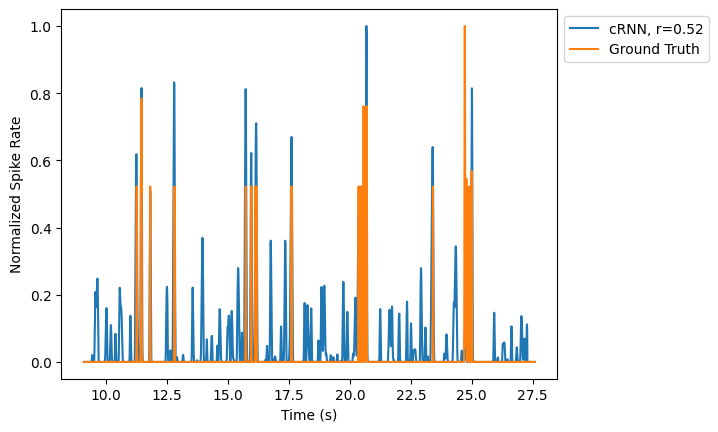

In [19]:
plt.plot(time1, normalize_data(convolved_spike_probs_cRNN), label = "cRNN, r=0.52")
plt.plot(time1, normalize_data(convolved_gt_spikes), label = "Ground Truth")
plt.ylabel("Normalized Spike Rate")
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1, 1))

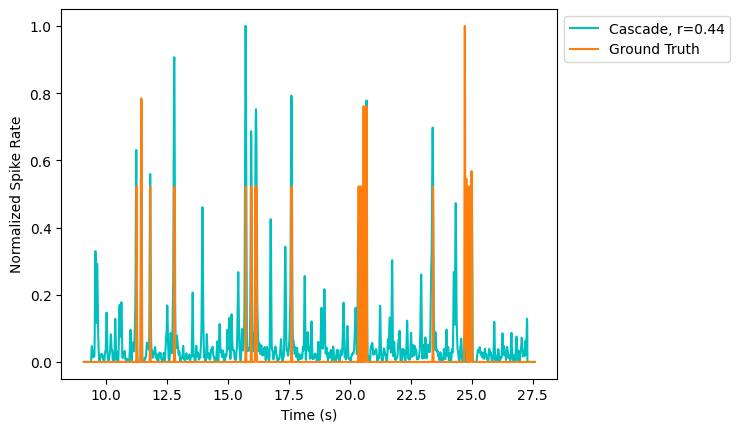

In [20]:
plt.plot(time1, normalize_data(convolved_spike_probs_default), color = "c", label = "Cascade, r=0.44")
plt.plot(time1, normalize_data(convolved_gt_spikes), color = "tab:orange", label = "Ground Truth")
plt.ylabel("Normalized Spike Rate")
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1, 1))

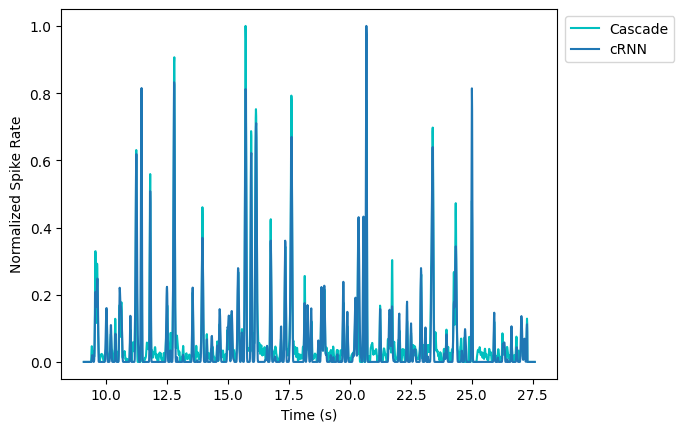

In [31]:
plt.plot(time1, normalize_data(convolved_spike_probs_default), color = "c", label = "Cascade")
plt.plot(time1, normalize_data(convolved_spike_probs_cRNN), label = "cRNN")
plt.ylabel("Normalized Spike Rate")
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1.25, 1))

In [25]:
pearsonr(np.nan_to_num(convolved_spike_probs_cRNN), convolved_gt_spikes)[0]

0.5183143995396162

In [26]:
pearsonr(np.nan_to_num(convolved_spike_probs_default), convolved_gt_spikes)[0]

0.4355024242454996

: 